# *Regresión Lineal*

## **1. Introducción**

En [estadística](https://https://es.wikipedia.org/wiki/Estad%C3%ADstica), la regresión lineal o ajuste lineal es un modelo matemático usado para aproximar la relación de dependencia entre una [variable dependiente](https://www.lifeder.com/variables-dependiente-independiente/) **Y**,  ***m*** [variables independientes](https://www.webyempresas.com/variable-independiente/) **$X_i$** con ***m*** $\in \mathbb Z^+$ y un término [aleatorio](https://es.wikipedia.org/wiki/Aleatoriedad) $\epsilon$. Este modelo puede ser expresado como: \\

$$
\\
Y=\beta_0+\beta_1X_1+...+\beta_mX_m+\epsilon
\\
$$

Se llama [regresión lineal simple](http://eio.usc.es/eipc1/BASE/BASEMASTER/FORMULARIOS-PHP-DPTO/MATERIALES/Mat_50140116_Regr_%20simple_2011_12.pdf) cuando solo hay una variable independiente y [regresión lineal múltiple](http://eio.usc.es/eipc1/BASE/BASEMASTER/FORMULARIOS-PHP-DPTO/MATERIALES/Mat_50140128_RegresionMultiple.pdf) cuando hay más de una. Dependiendo del contexto, a la variable modelada se le conoce como variable dependiente o variable respuesta, y a las variables independientes como regresores, predictores.

<img src=https://miro.medium.com/max/464/1*uqZFeQ0MlZ8nhaX2c4bAWw.png>

El objetivo con Regresión Lineal Simple es minimizar la distancia vertical entre todos los datos y nuestra línea, por lo tanto, para determinar la mejor línea, debemos minimizar la distancia entre todos los puntos y la distancia de nuestra línea.  Existen muchos métodos para cumplir con este objetivo, pero todos estos métodos tienen un solo objetivo que es el de minimizar la distancia.

Una forma en que el modelo de regresión encuentre la mejor línea de ajustes es utilizando el criterio de mínimos cuadrados para reducir el error.

El error es una parte inevitable del proceso de predicción, no importa cuán poderoso sea el algoritmo que elijamos, siempre habrá un error irreductible. Sabemos que no podemos eliminar por completo el error, pero aún podemos intentar reducirlo al nivel más bajo. Justamente es en este momento en que se usa la técnica conocida como mínimos cuadrados.

La técnica de mínimos cuadrado intenta reducir la suma de los errores al cuadrado, buscando el mejor valor posible de los coeficientes de regresión.

## **2. Historia**

La primera forma de regresión lineal documentada fue el [método de los mínimos cuadrados](https://es.wikipedia.org/wiki/M%C3%ADnimos_cuadrados) que fue publicada por Legendre en 1805, [Gauss](https://es.wikipedia.org/wiki/Carl_Friedrich_Gauss) publicó un trabajo en donde desarrollaba de manera más profunda el método de los mínimos cuadrados,y en dónde se incluía una versión del [teorema de Gauss-Márkov](https://es.wikipedia.org/wiki/Teorema_de_Gauss-M%C3%A1rkov).

El término regresión se utilizó por primera vez en el estudio de variables antropométricas: al comparar la estatura de padres e hijos, donde resultó que los hijos cuyos padres tenían una estatura muy superior al valor medio, tendían a igualarse a este, mientras que aquellos cuyos padres eran muy bajos tendían a reducir su diferencia respecto a la estatura media; es decir, "regresaban" al promedio.La constatación empírica de esta propiedad se vio reforzada más tarde con la justificación teórica de ese fenómeno.

El término lineal se emplea para distinguirlo del resto de técnicas de regresión, que emplean modelos basados en cualquier clase de función matemática. Los modelos lineales son una explicación simplificada de la realidad, mucho más ágiles y con un soporte teórico mucho más extenso por parte de la matemática y la estadística.

## **3. Algoritmo**

El algoritmo deberá minimizar el coste de una función de error cuadrático y esos coeficientes corresponderán con la recta óptima. Hay diversos métodos para conseguir minimizar el coste.
Para el desarrollo del algoritmo, se tomara como guia un [ejemplo](https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html), en el cual se explicara paso por paso el desarrollo del algoritmo utilizado.

##**3.1 Ejemplo de aplicacion de Regresión Lineal**

##**3.1.1 Librerias**

Se inicia por importar las Librerias que se van a utilizar:

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##**3.1.2 Cargar los datos**

Leemos los datos y lo cargamos como un dataset de Pandas

In [2]:
Edad = [15.5, 23.75, 8, 17, 5.5, 19, 24, 2.5, 7.5, 11, 13, 3.75, 25, 9.75, 22, 18, 6,
          12.5, 2, 21.5]

Resistencia = [2158.7, 1678.15, 2316, 2061.3, 2207.5, 1708.3, 1784.7, 2575, 2357.9, 2256.7, 
        2165.2, 2399.55, 1779.8, 2336.75, 1765.3, 2053.5, 2414.4, 2200.5, 2654.2, 1753.7
        ]

datos = pd.DataFrame({'Edad': Edad, 'Resistencia': Resistencia})
datos.head(2)

,Edad,Resistencia
0,15.50,2158.70
1,23.75,1678.15


##**3.1.3 Representación de los datos**

Primero vamos a generar la nube de puntos para observar el comportamiento de los datos, y asi podemos intuir si existe una relación y cuantificar dicha relación mediante un coeficiente de correlación.

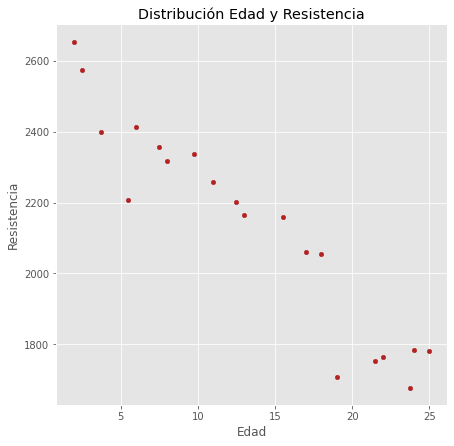

In [17]:
fig, ax = plt.subplots(figsize=(7, 7))

datos.plot(
    x    = 'Edad',
    y    = 'Resistencia',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución Edad y Resistencia');

In [18]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = datos['Edad'], y =  datos['Resistencia'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  -0.9496533218371342
P-value:  1.6433438181188956e-10


El gráfico y el test de correlación muestran una relación lineal negativa, de intensidad considerable (r = 0.94) y significativa (p-value = 0.0). Tiene sentido intentar generar un modelo de regresión lineal con el objetivo de predecir la resiistencia en funcion de la edad del propelente.

##**3.1.4.1 Ajuste del modelo** **texto en negrita**

Se ajusta un modelo empleando como variable respuesta **Resistencia** y como predictor **Edad**. Como en todo estudio predictivo, no solo es importante ajustar el modelo, sino también cuantificar su capacidad para predecir nuevas observaciones. Para poder hacer esta evaluación, se dividen los datos en dos grupos, uno de entrenamiento y otro de test.

In [19]:
# División de los datos en train y test
# ==============================================================================
X = datos[['Edad']]
y = datos['Resistencia']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: [2617.95868667]
Coeficiente: [('Edad', -37.03593371634774)]
Coeficiente de determinación R^2: 0.9010205900255304


Una vez entrenado el modelo, se evalúa la capacidad predictiva empleando el conjunto de test.

In [21]:
# Error de test del modelo 
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[1988.34781349]
 [2256.85833294]
 [2321.67121694]]

El error (rmse) de test es: 54.965769312042575


##**3.1.4.2 Ahora con otra libreria**
##***Statsmodels***

In [24]:
# División de los datos en train y test
# ==============================================================================
X = datos[['Edad']]
y = datos['Resistencia']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [25]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     121.9
Date:                Sun, 14 Mar 2021   Prob (F-statistic):           2.71e-08
Time:                        01:00:20   Log-Likelihood:                -96.161
No. Observations:                  16   AIC:                             196.3
Df Residuals:                      14   BIC:                             197.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2617.9587     54.314     48.201      0.0

##**3.1.5 Intervalos de confianza**

In [26]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
modelo.conf_int(alpha=0.05)

array([[2501.46724718, 2734.45012616],
       [ -44.23140438,  -29.84046305]])

##**3.1.6 Predicciones**

In [27]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,1803.168145,37.241509,1723.293052,1883.043237,1563.389308,2042.946982
1,1914.275946,30.960166,1847.872993,1980.678899,1678.642306,2149.909587
2,2414.261051,39.215035,2330.153166,2498.368936,2173.039169,2655.482934
3,2043.901714,26.735523,1986.559721,2101.243707,1810.659427,2277.144001


##**3.1.7 Gráfico del modelo**

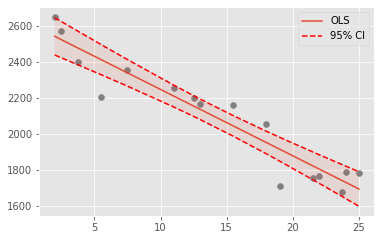

In [28]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
ax.legend();

In [29]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 54.96576931204147


##**3.1.8 Interpreción**

La columna $(coef)$ devuelve el valor estimado para los dos parámetros de la ecuación del modelo lineal $( \beta_0$  y  $\beta_1 )$ que equivalen a la ordenada en el origen (*intercepto*) y a la pendiente. Se muestran también los errores estándar, el valor del estadístico t y el p-value (dos colas) de cada uno de los dos parámetros. Esto permite determinar si los predictores son significativamente distintos de $0$, es decir, que tienen importancia en el modelo. Para el modelo generado, tanto la ordenada en el origen como la pendiente son significativas $$(p-values < 0.05)$$

El valor de *R-squared* indica que el modelo es capaz de explicar el $90\%$ de la variabilidad de la resistencia queda explicada por el modelo (*Edad*). 

El modelo lineal generado sigue la ecuación:
$$
Resistencia=2627.82-37.15X\,\,Edad
$$

Se puede interpretar que la pendiente de -37.15  es la disminución semanal promedio dde resistencia del propelente al corte, debido a su edad. 

El error de test del modelo es de $54.9$. Las predicciones del modelo final se alejan en promedio $54.9$ unidades del valor real.